### Załadowanie danych

In [1]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
print(f"Dataset keys: {cancer_data.keys()}")

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
# zobaczmy jakie mamy atrybuty i typy raka
print(f"Attributes names: {cancer_data['feature_names']}")
print(f"Target names: {cancer_data['target_names']}")

Attributes names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [3]:
# niewiele nam mówią atrybuty, ale też nie muszą
# zapiszmy dane do pandas
import pandas as pd
cancer_df = pd.DataFrame(data = cancer_data['data'], columns = cancer_data['feature_names'])
cancer_df['label'] = cancer_data['target']
cancer_df['cancer type'] = cancer_data['target_names'][cancer_df['label']]
cancer_df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,cancer type
270,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,benign
106,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1,benign
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020,0,malignant
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,...,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080,1,benign
20,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1,benign


In [4]:
# zprawdźmy typ danych i czy są wartości brakujące
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# podzielmy dane
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer_df.iloc[:,:-2], cancer_df['label'],
                                                    test_size=0.2, random_state = 42)

In [6]:
# zamiana typu na wygodniejszy numpy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [7]:
import numpy as np

### Perceptron


##### Zadanie 1

Napisz klasę Perceptron, taką, że:
*   w konstruktorze przyjmuje 3 argumenty: wagi, próg i stałą uczącą. Próg powinien być dodany do wag (slajd 19 wykład 4). Pomocna może być metoda np.append (https://numpy.org/doc/stable/reference/generated/numpy.append.html)
* ma metodę predict, która jako argument przyjmuje wektor feature'ów dla pojedyńczej obserwacji x i zwraca aktywację perceptrona (1 lub 0) (slajd 6 wykład 4, ale pamiętajmy o tym, że próg jest dodany do wag)
*   ma metodę train, która wywołuje metodę predict w celu otrzymania predykcji. Następnie przy pomocy reguły delta modyfikuje wagi (slajd 16 wykład 4)




In [11]:
class Perceptron:
    def __init__(self, weights, bias, learning_rate):
        self.weights = weights
        self.threshold = bias
        self.learning_rate = learning_rate

    def predict(self, x):
        weights = np.append(self.weights, self.bias)

        sum_of_weights = np.dot(x, weights)

        activation = 1 if sum_of_weights >= 0 else 0

        return activation

    def train(self, x, y):
        prediction = self.predict(x)

        error = y - prediction

        for i in range(len(self.weights)):
            self.weights[i] += self.learning_rate * error * x[i]

### Nauka perceptrona

In [12]:
# inicjalizacja wag z RandomState(42) aby testy przechodziły
weights = np.random.RandomState(42).randn(len(cancer_data['feature_names']))
bias = np.random.RandomState(42).randn(1)
learning_rate = 0.01

In [13]:
perceptron = Perceptron(weights, bias, learning_rate)

##### Zadanie 2

Stwórz pętlę treningową, w której każda obserwacja z x_train zostanie wykorzystana to nauki perceptronu. Pamiętaj o dodaniu dodatkowego elementu do wektora z feature'ami dla progu (-1).

In [18]:
def train_perceptron(perceptron, x_train, y_train, epochs):
  for epoch in range(epochs):
    for i in range(len(x_train)):
      x_train_with_bias = np.append(x_train[i], -1)

      prediction = perceptron.predict(x_train_with_bias)

      error = y_train[i] - prediction

      for j in range(len(perceptron.weights)):
        perceptron.weights[j] += perceptron.learning_rate * error * x_train_with_bias[j]

In [20]:
# test
expected_weights = np.array([5.293244153011232, 8.592635698828815, 29.904388538100687, 36.442029856408034, -0.183431774723336, -0.21964715694918033, 1.5475753955073916, 0.7512201391529091, -0.3782793859349525, 0.5803982435859647, -0.4415226928124625, 0.15628224642974298, 0.24982827156603402, -10.8607402446578, -1.7208941825130333, -0.5572332092409727, -1.008069900334423, 0.3164751425952739, -0.8972333955212108, -1.4106490363352913, 6.122728768921553, 10.810023699513462, 27.896028204687923, -35.56274818621347, -0.47652902452518264, 0.12270408970986606, -1.192125917422303, 0.3680674283456722, -0.46982268991880544, -0.24900314979327703, -0.11328584698876762])
assert(np.allclose(perceptron.weights, expected_weights))

ValueError: ignored

### Predykcja i ewaluacja

##### Zadanie 3

Stwórz pętlę testową, gdzie dla każdej obserwacji z x_test perceptron przewidzi 1 lub 0. Dodaj predykcje do zmiennej x_preds. Pamiętaj o dodaniu dodatkowego elementu do wektora z feature'ami dla progu (-1).

In [ ]:
y_preds = []
...

In [ ]:
# test
expected_preds = [False, False, False, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, False, False, True, True, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, True, False, False, True, False, False, True, True, True, False, True, True, False, True, True, False]
assert(expected_preds == y_preds)

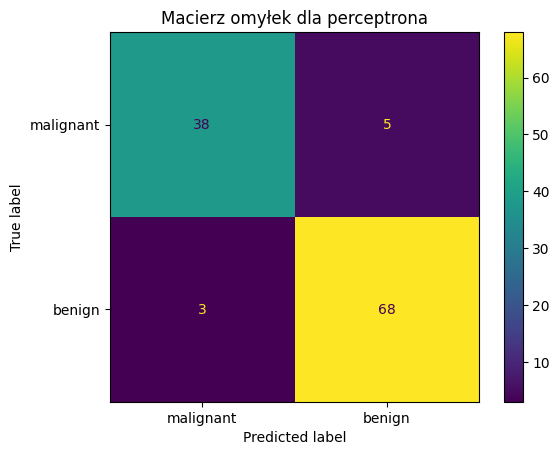

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_data['target_names'])
cm_display.plot()
plt.title("Macierz omyłek dla perceptrona")
plt.show()

##### Zadanie 4

Bazując na powyższej macierzy omyłek, policz na kartce precyzję, pełność i F-miarę, traktując najpierw "malignant" jako klasę "pozytywną", a następnie "benign" jako klasę "pozytywną".

In [ ]:
# do porówniania wyników
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

